<a href="https://colab.research.google.com/github/DatumLearning/yolov8-image-object-detection/blob/main/yolov8_images_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install ultralytics -q
!pip install pyyaml -q

In [7]:
from ultralytics import YOLO
import yaml
import cv2
from google.colab.patches import cv2_imshow

In [8]:
model = YOLO("yolov8n.pt")

In [9]:
model.predict("/content/car_and_dog.jpg" , save = True , save_txt = True)


image 1/1 /content/car_and_dog.jpg: 640x640 1 car, 1 dog, 296.3ms
Speed: 4.3ms preprocess, 296.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
1 label saved to runs/detect/predict2/labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [10]:
file_name = "/content/coco.yaml"
with open(file_name , "r") as stream:
  names = yaml.safe_load(stream)["names"]

In [11]:
names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [12]:
lis = open("/content/runs/detect/predict/labels/car_and_dog.txt" , "r").readlines()

In [13]:
lis

['2 0.479262 0.578243 0.95793 0.529086\n',
 '16 0.346053 0.237492 0.169154 0.218871\n']

In [14]:
for l in lis:
  ind = int(l.split()[0])
  print(ind , names[ind])

2 car
16 dog


In [16]:
li = lis[0].split()
xc , yc , nw , nh = float(li[1]) , float(li[2]) , float(li[3]) , float(li[4])

In [17]:
img = cv2.imread("/content/car_and_dog.jpg")
h , w = img.shape[0] , img.shape[1]

In [18]:
xc *= w
yc *= h
nw *= w
nh *= h
top_left = (int(xc - nw/2) , int(yc - nh/2))
bottom_right = (int(xc + nw/2) , int(yc + nh/2))

In [19]:
top_left , bottom_right

((0, 160), (490, 431))

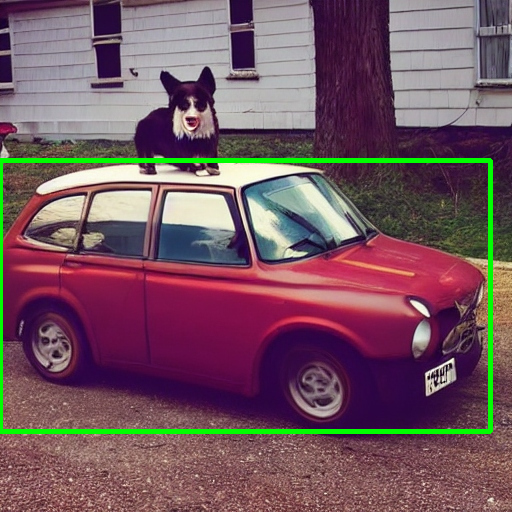

In [20]:
img = cv2.rectangle(img , top_left , bottom_right , (0 , 255 , 0) , 3)
cv2_imshow(img)

In [ ]:
model.predict("/content/doggo.jpg" , save = True , save_txt = True)

Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([4, 6])
 dtype: torch.float32
  + tensor([[1.31000e+02, 2.20000e+02, 3.09000e+02, 5.42000e+02, 9.08002e-01, 1.60000e+01],
         [1.31000e+02, 1.40000e+02, 5.68000e+02, 4.21000e+02, 8.88764e-01, 1.00000e+00],
         [4.67000e+02, 7.50000e+01, 6.92000e+02, 1.72000e+02, 5.30585e-01, 2.00000e+00],
         [4.67000e+02, 7.50000e+01, 6.93000e+02, 1.72000e+02, 5.08616e-01, 7.00000e+00]])]